<a href="https://colab.research.google.com/github/paulandrea0/Qualifica-o/blob/main/LPC_Clasificador_MLPerseptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# **Cargando Datos LPC de los sismos**

(1728, 13)
9.3221 -9.494
(256, 12) (1472, 12)
(40, 12) (362, 12)
(6, 12) (61, 12)
6.4644 -6.6297


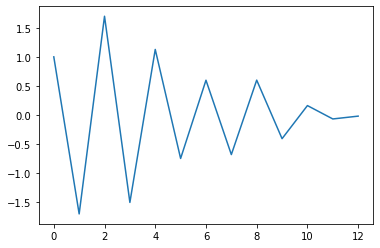

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import math
from math import floor
from scipy import signal
from scipy.signal import lfilter, resample
from scipy.signal.windows import hann
from numpy.random import randn 

VT =  pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_VT')
LP =  np.array(pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_LP'))
Tor = np.array(pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_Tor'))

VT = VT.dropna()
print(VT.shape)
VT = np.array(VT)
print(np.max(VT), np.min(VT))

LPC_test_1 = VT[1472:1728, 1:13]
LPC_train_1 = VT[0:1472, 1:13] 
LPC_test_2 = LP[362:402, 1:13]
LPC_train_2 = LP[0:362, 1:13]
LPC_test_3 = Tor[61:67, 1:13]
LPC_train_3 = Tor[0:61, 1:13]

print(LPC_test_1.shape, LPC_train_1.shape)
print(LPC_test_2.shape, LPC_train_2.shape)
print(LPC_test_3.shape, LPC_train_3.shape)

print(np.max(LP), np.min(LP))
plt.plot(VT[67])


# Representaciones de menor Dimensión

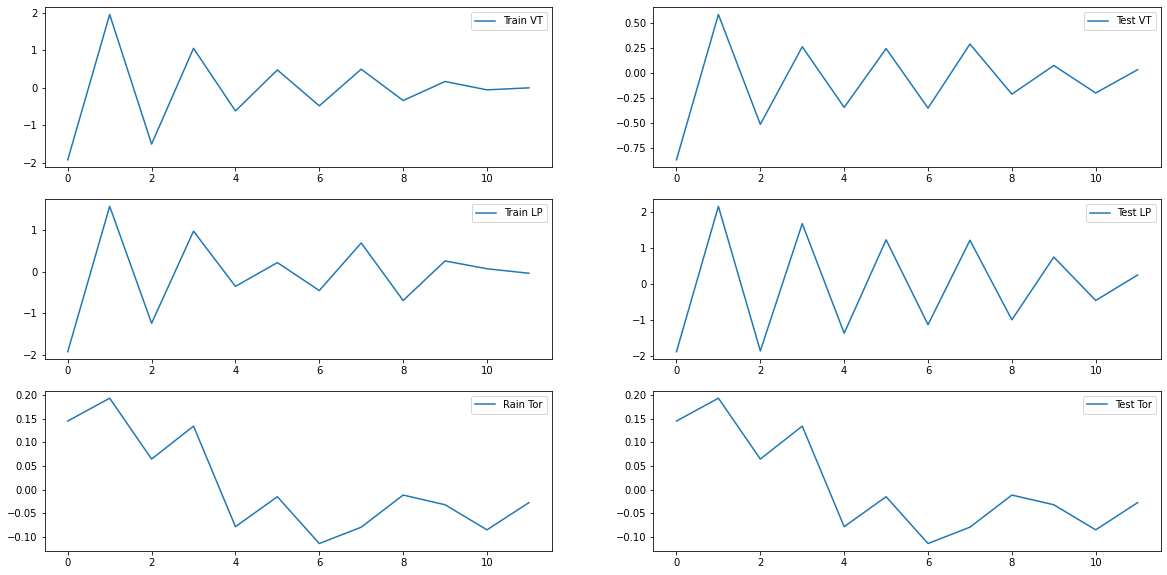

In [3]:
# Observamos cómo el modelo LPC consigue representar 

dato = 4    # Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(LPC_train_1[dato])
plt.legend(labels=["Train VT"])
plt.subplot(3,2,2)
plt.plot(LPC_test_1[dato])
plt.legend(labels=["Test VT"])
plt.subplot(3,2,3)
plt.plot(LPC_train_2[dato])
plt.legend(labels=["Train LP"])
plt.subplot(3,2,4)
plt.plot(LPC_test_2[dato])
plt.legend(labels=["Test LP"])
plt.subplot(3,2,5)
plt.plot(LPC_train_3[dato])
plt.legend(labels=["Rain Tor"])
plt.subplot(3,2,6)
plt.plot(LPC_test_3[dato])
plt.legend(labels=["Test Tor"])

# **Classificação com MLPerceptron**

**Normalización de las representaciones**

Mínimo y máximo originales: -7.9, 7.7
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -6.6, 6.5
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -0.1, 0.2
Mínimo y máximo normalizado: 0.0, 0.0
12


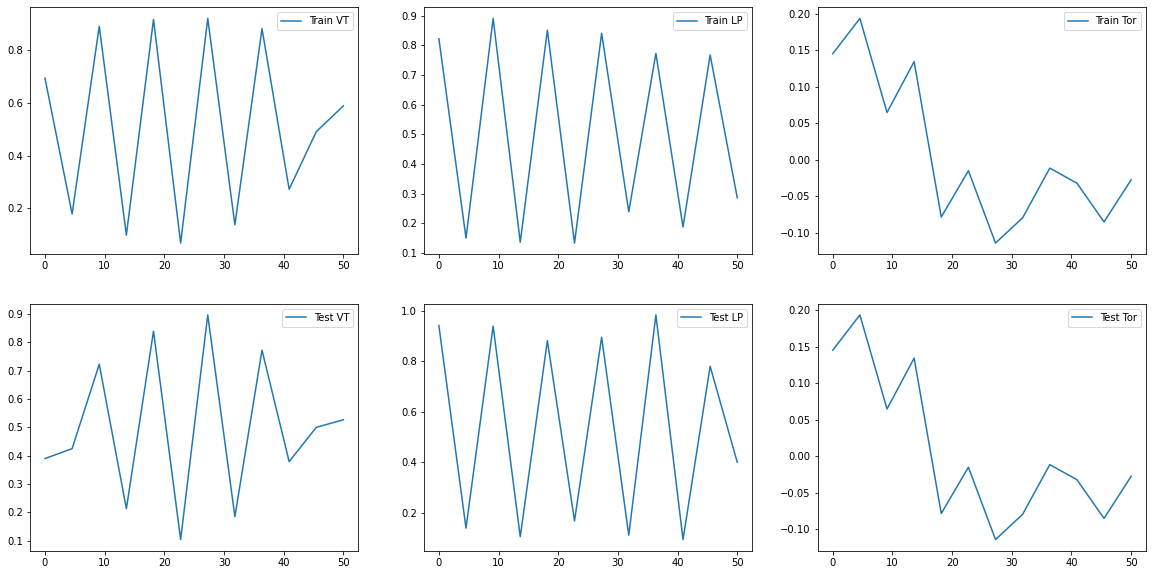

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
LPC_train_s1 = min_max_scaler.fit_transform(LPC_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LPC_train_1), np.max(LPC_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(LPC_train_s1), np.max(LPC_train_s1))) 
LPC_test_s1 = min_max_scaler.transform(LPC_test_1)  

# Señales LP
LPC_train_s2 = min_max_scaler.fit_transform(LPC_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LPC_train_2), np.max(LPC_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(LPC_train_s2), np.max(LPC_train_s2))) 
LPC_test_s2 = min_max_scaler.transform(LPC_test_2)  

# Señales Tor
LPC_train_s3 = min_max_scaler.fit_transform(LPC_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LPC_train_3), np.max(LPC_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(LPC_train_s3), np.max(LPC_train_s3))) 
LPC_test_s3 = min_max_scaler.transform(LPC_test_3)  

# Graficando
fs = 50 # frecuencia de muestreo
n3 = LPC_train_s1.shape[1]
t3 = np.linspace(0,fs,n3) # creando un vector de tiempo
print(len(t3))
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.plot(t3, LPC_train_s1[60])
plt.legend(labels=["Train VT"])
plt.subplot(232)
plt.plot(t3, LPC_train_s2[18])
plt.legend(labels=["Train LP"])
plt.subplot(233) 
plt.plot(t3, LPC_train_3[38])
plt.legend(labels=["Train Tor"])
plt.subplot(234)
plt.plot(t3, LPC_test_s1[44])
plt.legend(labels=["Test VT"])
plt.subplot(235)
plt.plot(t3, LPC_test_s2[34])
plt.legend(labels=["Test LP"])
plt.subplot(236)
plt.plot(t3, LPC_test_3[4])
plt.legend(labels=["Test Tor"])

In [ ]:
#D_test_s1, D_train_s1 = LPC_test_1, LPC_train_1
#D_test_s2, D_train_s2 = LPC_test_2, LPC_train_2
#D_test_s3, D_train_s3 = LPC_test_3, LPC_train_3

Preparando los datos para ser presentados en el clasificador

In [5]:
# a continuación son adicionadas tres columnas que me permitirán ser usadas de etiquetas para los tipos de sismos
D_train_s1 = np.insert(LPC_train_s1, [0], (1,0,0), axis=1)
D_test_s1 = np.insert(LPC_test_s1, [0], (1,0,0), axis=1)
D_train_s2 = np.insert(LPC_train_s2, [0], (0,1,0), axis=1)
D_test_s2 = np.insert(LPC_test_s2, [0], (0,1,0), axis=1)
D_train_s3 = np.insert(LPC_train_s3, [0], (0,0,1), axis=1)
D_test_s3 = np.insert(LPC_test_s3, [0], (0,0,1), axis=1)

print(D_train_s1[1,0:5], D_test_s1[1,0:5])
print(D_train_s2[1,0:5], D_test_s2[1,0:5])
print(D_train_s3[1,0:5], D_test_s3[1,0:5])
print(D_train_s1[1,0:5], D_test_s1[1,0:5])
print(D_train_s2[1,0:5], D_test_s2[1,0:5])
print(D_train_s3[1,0:5], D_test_s3[1,0:5])

# Creo mi set de entrenamiento con sismos y sus etiquetas correspondientes y lo mismo para mi set de prueba
set_train = np.concatenate([D_train_s1,D_train_s2, D_train_s3], axis=0) 
set_test = np.concatenate([D_test_s1,D_test_s2, D_test_s3], axis=0) 
y_vector = np.concatenate([set_train, set_test])
y_vector = y_vector[:,0:3]
# le doy una mezcla a los datos para que entren en desorden en la red neuronal
np.random.shuffle(set_train)
np.random.shuffle(set_test)

print(set_train.shape, set_test.shape)

[1.         0.         0.         0.57654643 0.28845332] [1.         0.         0.         0.75826786 0.20120714]
[0.         1.         0.         0.4566784  0.35696868] [0.         1.         0.         0.69219434 0.19819599]
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.]
[1.         0.         0.         0.57654643 0.28845332] [1.         0.         0.         0.75826786 0.20120714]
[0.         1.         0.         0.4566784  0.35696868] [0.         1.         0.         0.69219434 0.19819599]
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.]
(1895, 15) (302, 15)


In [6]:
print(set_train.shape, set_test.shape)
y_train, X_train =  set_train[:,0:3], np.delete(set_train, range(0, 3), axis=1)
y_test, X_test = set_test[:,0:3], np.delete(set_test, range(0, 3), axis=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train[1,0:5], X_train[1,0:5])
print(y_test[256,0:5], X_test[256,0:5])

(1895, 15) (302, 15)
(1895, 12) (1895, 3) (302, 12) (302, 3)
[1. 0. 0.] [0.32706011 0.51664645 0.62687968 0.29749949 0.76144282]
[1. 0. 0.] [0.78121945 0.14970585 0.92457702 0.07169908 0.93210604]


Entrenamos un MLP para clasificar tres clases de sismos

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

In [8]:
np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])      

x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.25)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

12
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 500)               6500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 56,903
Trainable params: 56,903
Non-trainabl

In [9]:
clasificador = Model(inputs=entrada, outputs=saida)
clasificador.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = clasificador.fit(X_train, y_train,    
                           epochs=25,
                           batch_size=150,
                           validation_data=(X_test, y_test),    
                           shuffle=True)

Epoch 1/25
13/13 [==============================] - 1s 25ms/step - loss: 0.3951 - accuracy: 0.7029 - val_loss: 0.2119 - val_accuracy: 0.8477
Epoch 2/25
13/13 [==============================] - 0s 10ms/step - loss: 0.2362 - accuracy: 0.7768 - val_loss: 0.1771 - val_accuracy: 0.8477
Epoch 3/25
13/13 [==============================] - 0s 9ms/step - loss: 0.2140 - accuracy: 0.7768 - val_loss: 0.1590 - val_accuracy: 0.8477
Epoch 4/25
13/13 [==============================] - 0s 9ms/step - loss: 0.1968 - accuracy: 0.7768 - val_loss: 0.1441 - val_accuracy: 0.8477
Epoch 5/25
13/13 [==============================] - 0s 11ms/step - loss: 0.1827 - accuracy: 0.7778 - val_loss: 0.1330 - val_accuracy: 0.8477
Epoch 6/25
13/13 [==============================] - 0s 11ms/step - loss: 0.1719 - accuracy: 0.8058 - val_loss: 0.1246 - val_accuracy: 0.8675
Epoch 7/25
13/13 [==============================] - 0s 9ms/step - loss: 0.1632 - accuracy: 0.8090 - val_loss: 0.1172 - val_accuracy: 0.8675
Epoch 8/25
13/13

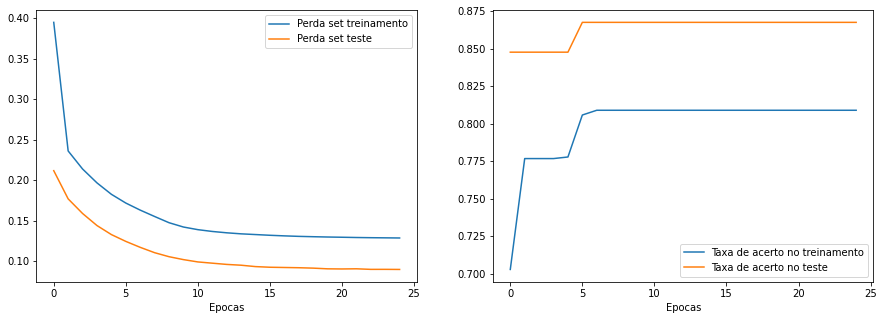

In [10]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Perda set treinamento")
plt.plot(historia.history["val_loss"], label="Perda set teste")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Taxa de acerto no treinamento")
plt.plot(historia.history["val_accuracy"], label="Taxa de acerto no teste")
plt.xlabel('Epocas')
plt.legend()

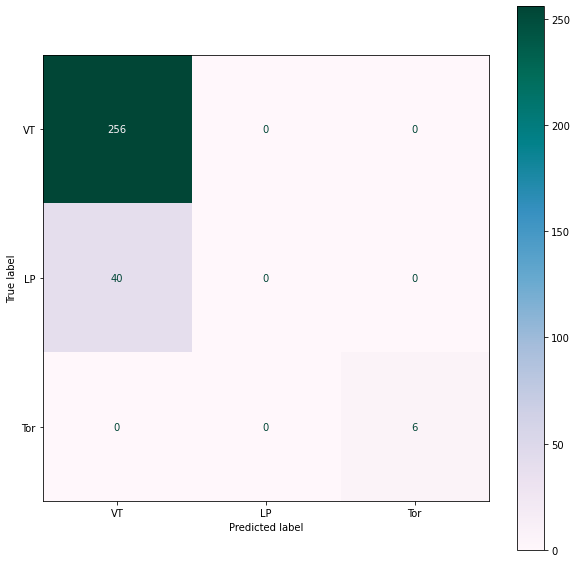

[[256   0   0]
 [ 40   0   0]
 [  0   0   6]]
[[[  6  40]
  [  0 256]]

 [[262   0]
  [ 40   0]]

 [[296   0]
  [  0   6]]]


In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

clasificador = Model(inputs=entrada, outputs=saida)
y_pred = clasificador.predict(X_test)

y_pred_ = np.rint(y_pred)

y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

y_salida = []
for i in range(len(y_pred_)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor')

# Matriz de confusión multiclase
c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None )
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.show()

plt.show()

print(c)
cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)

cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]

**Sensitividad y Especificidad**



*   Verdaderos Positivos (TP): La clase de sismo de interés que ha sido clasificada correctamente, 
*   Falsos negativos (FN): La clase de sismo de interés que fue clasificada como otro tipo de sismo,
*   Verdadero negativo (TN): Otros tipo de sismo que fue correctamente clasificado como un tipo de sismo diferente a la clase de interés, y
*   Falsos positivos (FP): cuando un sismo diferente fue clasificado como si fuera el simo de la clase de interés.

La ** sensitividad** mide la proporción de los sismos de interés detectados correctamente, una sensitividad del 100% detectará todos los sismos de interés:

$$Sensitividad = \dfrac{TP}{TP+FN}$$

La **especificidad** mide la proporción de otro tipo de sismos que fueron detectados correctamente diferentes a la clase de interés. Una especificidad del 100% detectará sismos diferentes a la clase de interés:
$$Especificidad = \dfrac{TN}{TN+FP}$$

In [12]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[0,1]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[1,0]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[1,0]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres  


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1  

In [13]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')

# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')

# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')

# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

Especificidad VT: 100.0%
Especificidad LP: 86.8%
Especificidad Tor: 100.0%
Sensitividad VT: 86.5%
Sensitividad LP: nan%
Sensitividad Tor: 100.0%
Precisión VT: 100.0%
Precisión LP: 0.0%
Precisión Tor: 100.0%
f1 score VT: 92.8%
f1 score LP: nan%
f1 score Tor: 100.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [14]:
from sklearn.metrics import classification_report
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_test, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

          VT       0.86      1.00      0.93       256
          LP       0.00      0.00      0.00        40
         Tor       1.00      1.00      1.00         6

   micro avg       0.87      0.87      0.87       302
   macro avg       0.62      0.67      0.64       302
weighted avg       0.75      0.87      0.81       302
 samples avg       0.87      0.87      0.87       302



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 3

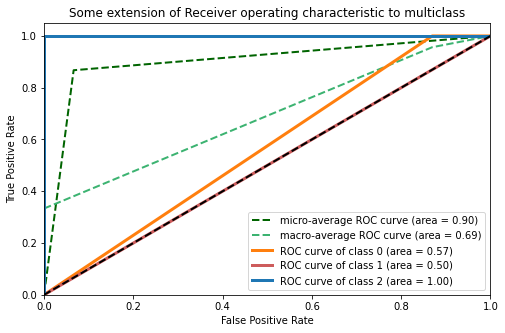

In [16]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="darkgreen", #deeppink
    linestyle="--",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="mediumseagreen", #
    linestyle="--",
    linewidth=2,
)

colors = cycle(["tab:orange", "indianred", "tab:blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# **Código alternativo para las gráficas ROC**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

''' 
Definiendo funciones
'''

def calculate_tpr_fpr(y_test_label, y_pred_label):
  cm = confusion_matrix(df_aux['class'], df_aux['prob'])
  TN = cm[0, 0]
  FP = cm[0, 1]
  FN = cm[1, 0]
  TP = cm[1, 1]

  # Calcula tpr y fpr
  tpr =  TP/(TP + FN) # sensitivity - true positive rate
  fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

  return tpr, fpr



def get_all_roc_coordinates(etiquetas, y_probab):
    
    # Calcula todas las coordenadas de la curva ROC (tpr y fpr) considerando cada punto como un umbral para la predicción de la clase.
    
    # Args:
        # etiquetas: La lista o serie con las etiquetas de las clases reales.
        # y_probab: El arreglo con las probabilidades para cada clase, obtenido usando el método `clasificador.predict(X_test)`.
        
    # Returns:
        # tpr_list: la lista de TPR que representan cada umbral.
        # fpr_list: la lista de FPR que representa cada umbral.
    
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_probab)):
        threshold = y_probab[i]
        y_predict = y_probab >= threshold
        tpr, fpr = calculate_tpr_fpr(etiquetas, y_predict)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    
    # grafica la curva ROC utilizando la lista de coordenadas (tpr y fpr).
    
    # Args:
        # tpr: La lista de TPR que representan cada coordenada.
        # fpr: La lista de FPR que representan cada coordenada.
        # scatter: Cuando es Verdadero, los puntos utilizados en el cálculo se trazarán con la línea (predeterminado = Verdadero).
    
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
from numpy.ma.core import concatenate
y_array = []
for i in range(len(y_train)):
  if y_vector[i,0] > 0:
    y_array.append('VT')
  if y_vector[i,1] > 0:
    y_array.append('LP')
  if y_vector[i,2] > 0:
    y_array.append('Tor')
i = i + 1
df = pd.DataFrame({'class': y_array})


y_clas = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_clas.append('VT')
  if y_test[i,1] > 0:
    y_clas.append('LP')
  if y_test[i,2] > 0:
    y_clas.append('Tor')

i = i + 1
df_class = pd.DataFrame({'class': y_clas})

y = df['class']
y_class = df_class['class']

X_test = pd.DataFrame(X_test)

print(y_class)
print(y)


0      LP
1      VT
2      VT
3      VT
4      VT
       ..
297    VT
298    VT
299    LP
300    VT
301    VT
Name: class, Length: 302, dtype: object
0        VT
1        VT
2        VT
3        VT
4        VT
       ... 
1890    Tor
1891    Tor
1892    Tor
1893    Tor
1894    Tor
Name: class, Length: 1895, dtype: object


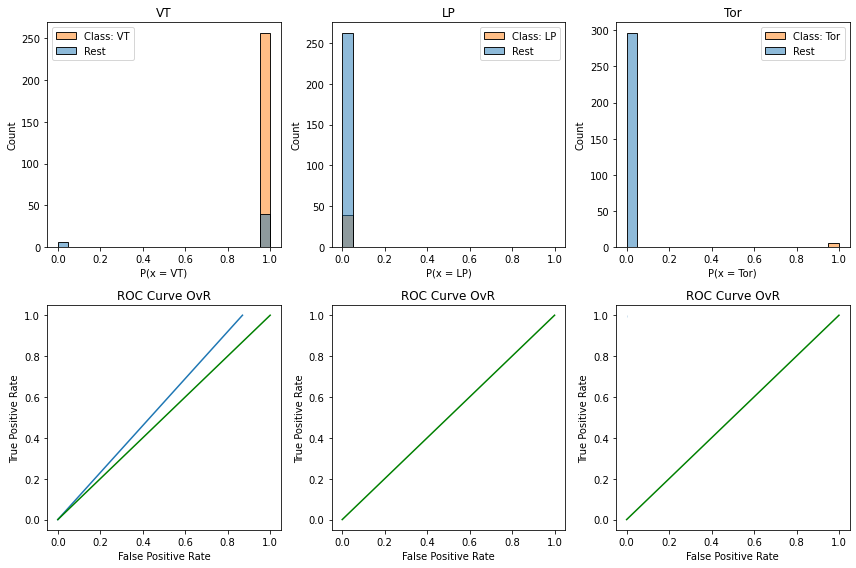

In [ ]:
#classes = model_multiclass.classes_
classes = np.array(['VT', 'LP', 'Tor'], dtype=object)
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_class]
    df_aux['prob'] = y_pred_[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [ ]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_pred, labels = classes, multi_class = 'ovr', average = 'macro')

VT ROC AUC OvR: 0.5652
LP ROC AUC OvR: 0.5000
Tor ROC AUC OvR: 1.0000
average ROC AUC OvR: 0.6884


0.6725043690881182